In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time
import warnings
from os import listdir
from os.path import isfile, join

warnings.filterwarnings(action = 'ignore')
start_time = time.time()

## Graph Representation

In [2]:
# implementation of an undirected graph using Adjacency Lists
class Vertex:
    def __init__(self, name):
        self.name = name
        self.neighbors = list()
    
    def add_neighbor(self, v):
        if v not in self.neighbors:
            self.neighbors.append(v)
    
class Graph:
    def __init__(self):
        self.vertices = {}
    
    def add_vertex(self, vertex):
        if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
            self.vertices[vertex.name] = vertex
            return True
        else:
            return False
    
    def add_edge(self, u, v):
        if u in self.vertices and v in self.vertices:
            if v not in self.vertices[u].neighbors: # removing multiple edges between two nodes
                self.vertices[u].add_neighbor(v)
                return True
        else:
            return False
    
    def sort_neighbors(self):
        for x in self.vertices:
            self.vertices[x].neighbors.sort()
            
    def print_graph(self):
        for key in self.vertices.keys():
            print(str(key) + ": " + str(self.vertices[key].neighbors))

## K-core algorithm

In [3]:
# https://pdfs.semanticscholar.org/fce2/bc7618628c0481d4cf6a43f5f368e7f8b9c0.pdf
# VZ algorithm implementation of k-core -- O(m)

def k_core_implementation():
    n = len(G.vertices)
    
    # calculating the max degree in the graph and also degree of each node
    deg = [0]*n
    md = 0 # maximum degree
    for i in range(n):
        deg[i] = len(G.vertices[i].neighbors)
        md = max(deg[i], md)
    md += 1 # incrementing maximum degree by 1 to include the max index in the bucket
    
    # calculating the size of each bucket
    bucket = [0]*md
    for i in range(n):
        bucket[deg[i]] += 1
        
    # partial sum of bucket size, denotes the starting index of each bucket
    cursum = 0
    for i in range(md):
        val = bucket[i]
        bucket[i] = cursum
        cursum += val
    
    # sorting using bucket sort and keeping the position in pos array
    valBucket = [0]*md
    vert = [0]*n # sorted array
    pos = [0]*n # pos of a node in sorted bucket
    for i in range(n):
        pos[i] = bucket[deg[i]] + valBucket[deg[i]] # starting position of bucket + val found so far
        vert[pos[i]] = i
        valBucket[deg[i]] += 1
    # calculating the core of each node by eliminating lower degree nodes
    for i in range(n):
        u = vert[i]
        for v in G.vertices[u].neighbors:
            if(deg[v] > deg[u]):
                curDeg = deg[v]
                posV = pos[v]
                firstValOfCurBucketInd = bucket[curDeg]
                firstValOfCurBucket = vert[firstValOfCurBucketInd]
                if firstValOfCurBucket != v: # swap the values inside bucket
                    pos[v] = firstValOfCurBucketInd
                    pos[firstValOfCurBucket] = posV
                    vert[firstValOfCurBucketInd] = v
                    vert[posV] = firstValOfCurBucket
                bucket[curDeg] += 1
                deg[v] -= 1
    return deg

## Intersecting all the matrix of a certain category

In [11]:
directory="../datasets/children/asd/";
onlyfiles = [f for f in listdir(directory) if isfile(join(directory, f))]
# print(onlyfiles)

G = Graph()
final_matrix = np.ones((116, 116), dtype=int)
for file in onlyfiles:
    A = np.loadtxt(directory+file, dtype=int)
    final_matrix = final_matrix & A

# now create the graph with the final matrix
# an edge in this matrix means this edge is included in all the children of this category
n = final_matrix.shape[0]
for x in range(0, n):
    G.add_vertex(Vertex(x))
x = 0;
for line in final_matrix:
    y = 0;
    for val in line:
        if val == 1:
            G.add_edge(x, y)
        y = y + 1
    x = x + 1

print("adjacency list, representing the neighbors of each node:")
G.print_graph()

adjacency list, representing the neighbors of each node:
0: [0]
1: [1]
2: [2, 6]
3: [3]
4: [4]
5: [5]
6: [2, 6]
7: [7]
8: [8]
9: [9]
10: [10, 12]
11: [11, 13]
12: [10, 12]
13: [11, 13]
14: [14]
15: [15]
16: [16, 80]
17: [17, 79]
18: [18]
19: [19]
20: [20]
21: [21]
22: [22]
23: [23]
24: [24]
25: [25]
26: [26]
27: [27]
28: [28]
29: [29]
30: [30, 31]
31: [30, 31]
32: [32]
33: [33]
34: [34]
35: [35]
36: [36, 40]
37: [37]
38: [38]
39: [39]
40: [36, 40]
41: [41]
42: [42, 43, 46, 47]
43: [42, 43]
44: [44]
45: [45]
46: [42, 46]
47: [42, 47]
48: [48]
49: [49]
50: [50]
51: [51]
52: [52]
53: [53]
54: [54]
55: [55]
56: [56]
57: [57]
58: [58, 59]
59: [58, 59]
60: [60]
61: [61]
62: [62]
63: [63]
64: [64]
65: [65]
66: [66]
67: [67]
68: [68, 69]
69: [68, 69]
70: [70]
71: [71]
72: [72]
73: [73]
74: [74]
75: [75]
76: [76, 77]
77: [76, 77]
78: [78, 80]
79: [17, 79, 81]
80: [16, 78, 80]
81: [79, 81]
82: [82]
83: [83]
84: [84]
85: [85]
86: [86]
87: [87]
88: [88]
89: [89]
90: [90]
91: [91]
92: [92]
93: [93]

## If you want to work with single file

In [5]:
# f = open("../datasets/children/asd/MaxMun_c_0051348.txt", 'r')

# lines = list()
# for line in f: # read the lines
#     lines.append(line)
# n = len(lines)

# G = Graph()
# for x in range(0, n):
#     G.add_vertex(Vertex(x))
    
# x = 0;
# for line in lines:
#     y = 0;
#     for val in line.split():
#         if int(val) == 1:
#             G.add_edge(x, y)
#         y = y + 1
#     x = x + 1
# print("adjacency list, representing the neighbors of each node:")
# G.print_graph()

## K-core decompostion

In [6]:
kCore = k_core_implementation()
maxKCore = max(kCore)
print("max-core:", maxKCore)

print("----------------------------------------------------")
print("k-core values of each node:")
for key in G.vertices.keys():
    print("[" + str(key) + "] " + str(kCore[key]))

max-core: 2
----------------------------------------------------
k-core values of each node:
[0] 1
[1] 1
[2] 2
[3] 1
[4] 1
[5] 1
[6] 2
[7] 1
[8] 1
[9] 1
[10] 2
[11] 2
[12] 2
[13] 2
[14] 1
[15] 1
[16] 2
[17] 2
[18] 1
[19] 1
[20] 1
[21] 1
[22] 1
[23] 1
[24] 1
[25] 1
[26] 1
[27] 1
[28] 1
[29] 1
[30] 2
[31] 2
[32] 1
[33] 1
[34] 1
[35] 1
[36] 2
[37] 1
[38] 1
[39] 1
[40] 2
[41] 1
[42] 2
[43] 2
[44] 1
[45] 1
[46] 2
[47] 2
[48] 1
[49] 1
[50] 1
[51] 1
[52] 1
[53] 1
[54] 1
[55] 1
[56] 1
[57] 1
[58] 2
[59] 2
[60] 1
[61] 1
[62] 1
[63] 1
[64] 1
[65] 1
[66] 1
[67] 1
[68] 2
[69] 2
[70] 1
[71] 1
[72] 1
[73] 1
[74] 1
[75] 1
[76] 2
[77] 2
[78] 2
[79] 2
[80] 2
[81] 2
[82] 1
[83] 1
[84] 1
[85] 1
[86] 1
[87] 1
[88] 1
[89] 1
[90] 1
[91] 1
[92] 1
[93] 1
[94] 1
[95] 1
[96] 1
[97] 1
[98] 1
[99] 1
[100] 1
[101] 1
[102] 1
[103] 1
[104] 1
[105] 1
[106] 1
[107] 1
[108] 1
[109] 1
[110] 1
[111] 1
[112] 1
[113] 1
[114] 1
[115] 1


## Creating the k-core list, each entry will contain corresponding nodes in that k-core

In [7]:
kCoreList = dict()
for i in range(maxKCore+1):
    kCoreList[i] = list()
for i in range(len(kCore)):
    kCoreList[kCore[i]].append(i)
    
kCoreCount = list()
for i in range(len(kCoreList)):
    kCoreCount.append(len(kCoreList[i]))
for i in range(len(kCoreCount)-2, -1, -1):
    kCoreCount[i] = kCoreCount[i] + kCoreCount[i+1]

print("number of nodes in each core (0 - max-core):")
print(kCoreCount) # number of nodes in each k-core

number of nodes in each core (0 - max-core):
[116, 116, 26]


## Plotting the max-core nodes and their connectivity

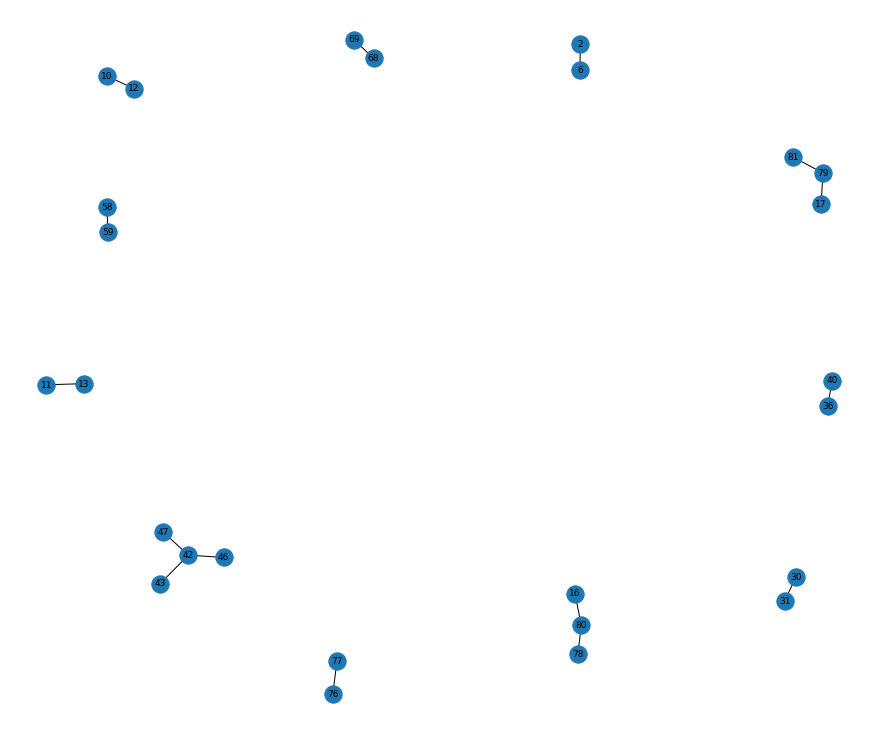

In [8]:
Gcore = nx.Graph()
curlist = kCoreList[len(kCoreList)-1]
# curlist = random.sample(curlist, k=15)
for x in curlist:
    Gcore.add_node(x)
for x in curlist:
    for y in G.vertices[x].neighbors:
        if y in curlist:
            Gcore.add_edge(x, y)

plt.figure(figsize=(12,10))
nx.draw_spring(Gcore, with_labels=True, font_size=9)
plt.show()

# nx.draw
# nx.draw_random
# nx.draw_circular
# nx.draw_spectral
# nx.draw_spring

## Plotting all the nodes and their connectivity for a particular k-core

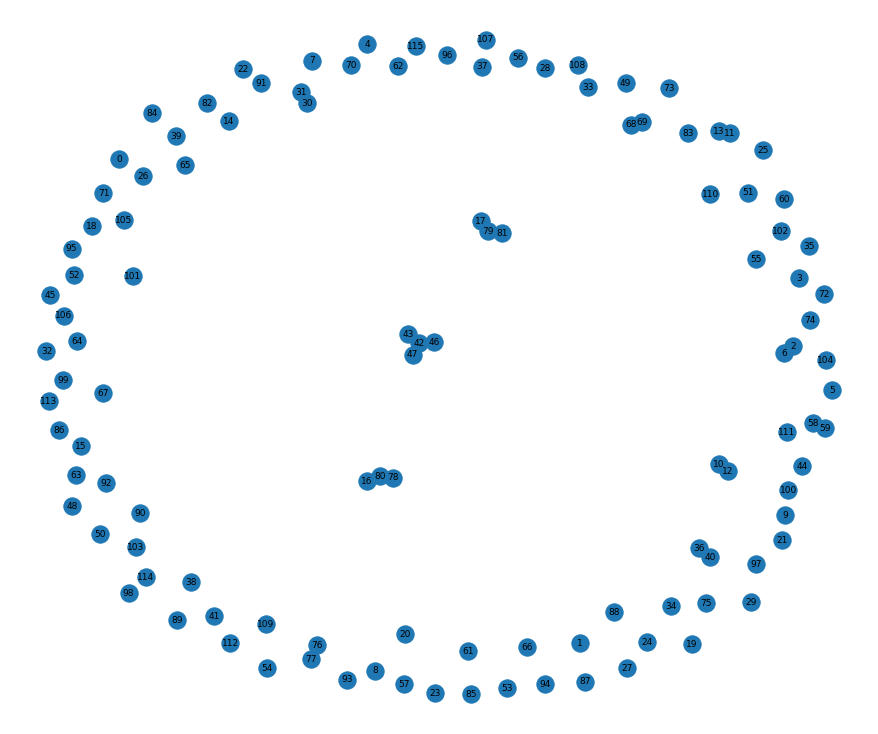

In [12]:
Gcore = nx.Graph()
k = 1
for key in G.vertices.keys():
    if kCore[key] >= k:
        Gcore.add_node(key);
for x in Gcore.nodes():
    for y in G.vertices[x].neighbors: # getting the neighbour from original graph
        if y in Gcore.nodes():
            Gcore.add_edge(x, y)

plt.figure(figsize=(12,10))
nx.draw_spring(Gcore, with_labels=True, font_size=9)
plt.show()

In [10]:
print("It took %s seconds to process" % (time.time() - start_time))

It took 1.3775503635406494 seconds to process
